In [67]:
from sklearn.datasets import load_boston
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
boston = load_boston()


In [68]:
print(boston.data.shape)

(506, 13)


In [69]:
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [70]:
print(boston.target)

[24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 15.  18.9 21.7 20.4
 18.2 19.9 23.1 17.5 20.2 18.2 13.6 19.6 15.2 14.5 15.6 13.9 16.6 14.8
 18.4 21.  12.7 14.5 13.2 13.1 13.5 18.9 20.  21.  24.7 30.8 34.9 26.6
 25.3 24.7 21.2 19.3 20.  16.6 14.4 19.4 19.7 20.5 25.  23.4 18.9 35.4
 24.7 31.6 23.3 19.6 18.7 16.  22.2 25.  33.  23.5 19.4 22.  17.4 20.9
 24.2 21.7 22.8 23.4 24.1 21.4 20.  20.8 21.2 20.3 28.  23.9 24.8 22.9
 23.9 26.6 22.5 22.2 23.6 28.7 22.6 22.  22.9 25.  20.6 28.4 21.4 38.7
 43.8 33.2 27.5 26.5 18.6 19.3 20.1 19.5 19.5 20.4 19.8 19.4 21.7 22.8
 18.8 18.7 18.5 18.3 21.2 19.2 20.4 19.3 22.  20.3 20.5 17.3 18.8 21.4
 15.7 16.2 18.  14.3 19.2 19.6 23.  18.4 15.6 18.1 17.4 17.1 13.3 17.8
 14.  14.4 13.4 15.6 11.8 13.8 15.6 14.6 17.8 15.4 21.5 19.6 15.3 19.4
 17.  15.6 13.1 41.3 24.3 23.3 27.  50.  50.  50.  22.7 25.  50.  23.8
 23.8 22.3 17.4 19.1 23.1 23.6 22.6 29.4 23.2 24.6 29.9 37.2 39.8 36.2
 37.9 32.5 26.4 29.6 50.  32.  29.8 34.9 37.  30.5 36.4 31.1 29.1 50.
 33.3 3

In [71]:
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [72]:
import pandas as pd

bos = pd.DataFrame(boston.data)
print(bos.head())

        0     1     2    3      4      5     6       7    8      9     10  \
0  0.00632  18.0  2.31  0.0  0.538  6.575  65.2  4.0900  1.0  296.0  15.3   
1  0.02731   0.0  7.07  0.0  0.469  6.421  78.9  4.9671  2.0  242.0  17.8   
2  0.02729   0.0  7.07  0.0  0.469  7.185  61.1  4.9671  2.0  242.0  17.8   
3  0.03237   0.0  2.18  0.0  0.458  6.998  45.8  6.0622  3.0  222.0  18.7   
4  0.06905   0.0  2.18  0.0  0.458  7.147  54.2  6.0622  3.0  222.0  18.7   

       11    12  
0  396.90  4.98  
1  396.90  9.14  
2  392.83  4.03  
3  394.63  2.94  
4  396.90  5.33  


In [73]:
bos['PRICE'] = boston.target
X = bos.drop('PRICE', axis = 1)
Y = bos['PRICE']

In [74]:
print(bos.head())

         0     1     2    3      4      5     6       7    8      9    10  \
0  0.00632  18.0  2.31  0.0  0.538  6.575  65.2  4.0900  1.0  296.0  15.3   
1  0.02731   0.0  7.07  0.0  0.469  6.421  78.9  4.9671  2.0  242.0  17.8   
2  0.02729   0.0  7.07  0.0  0.469  7.185  61.1  4.9671  2.0  242.0  17.8   
3  0.03237   0.0  2.18  0.0  0.458  6.998  45.8  6.0622  3.0  222.0  18.7   
4  0.06905   0.0  2.18  0.0  0.458  7.147  54.2  6.0622  3.0  222.0  18.7   

       11    12  PRICE  
0  396.90  4.98   24.0  
1  396.90  9.14   21.6  
2  392.83  4.03   34.7  
3  394.63  2.94   33.4  
4  396.90  5.33   36.2  


In [75]:
# applying column standardization on train and test data
from sklearn.preprocessing import StandardScaler
s=StandardScaler()
X_data=s.fit_transform(np.array(X))
Y_data=s.fit_transform(np.array(Y).reshape(-1,1))

In [76]:
results=pd.DataFrame(columns=['sno', 'algo', 'alpha', 'init_lr_rate', 'n_iter','weight','intercept', 'error'])

## Applying manual SGD on Boston Dataset

In [77]:
def manual_sgd(alpha, lr_rate, n_iter):
    wj_plus1=np.zeros(shape=(1,13))
    bj_plus1=0
    n=1
    r=lr_rate
    n_iter=n_iter
    while(n<=n_iter):
        wj=wj_plus1
        bj=bj_plus1
        w_=np.zeros(shape=(1,13))
        b_=0
      
        
        for i in range(10):  # for getting the derivatives using sgd with k=10
                y_curr=np.dot(wj,X_data[i])+bj
                w_ = w_ + X_data[i] * (Y_data[i] - y_curr)
                b_ = b_ + (Y_data[i]-y_curr)
                        
        wj_plus1=(wj-r*(w_ * (-2/X_data.shape[0])))
        bj_plus1=(bj-r*(b_ * (-2/X_data.shape[0])))
        n=n+1
    
    y_pred=[]
    for i in range(len(X_data)):
        y=np.asscalar(np.dot(wj_plus1,X_data[i])+bj_plus1)
        y_pred.append(y)
    
    
    plt.scatter(Y_data,y_pred)
    plt.grid(b=True, linewidth=0.3)
    plt.title('scatter plot between actual y and predicted y')
    plt.xlabel('actual y')
    plt.ylabel('predicted y')
    plt.show()
    
    
    
       
    manual_error=mean_squared_error(Y_data,y_pred)
    print('error=',manual_error)
    
    
    print('**************************************************************')
    return wj_plus1, bj_plus1, manual_error
    
    

## Applying sklearn SGD on boston dataset

In [78]:
import seaborn as sns
import numpy as np
from sklearn.linear_model import SGDRegressor
def sklearn_sgd(alpha,lr_rate,n_iter):
    clf=SGDRegressor(alpha=alpha,eta0 =lr_rate,max_iter=n_iter)
    clf.fit(X_data, Y_data.ravel())
    y_pred=clf.predict(X_data)
    
    #scatter plot
    plt.scatter(Y_data,y_pred)
    plt.title('scatter plot between actual y and predicted y')
    plt.xlabel('actual y')
    plt.ylabel('predicted y')
    plt.grid(b=True, linewidth=0.5)
    plt.show()
    
    
    #kdeplot
    
       
    sgd_error=mean_squared_error(Y_data,y_pred)
    print('mean sq error=', sgd_error)
    print('Maximum number of iteration=', n_iter)
    
    print('***********************************************************')
    return clf.coef_, clf.intercept_, sgd_error


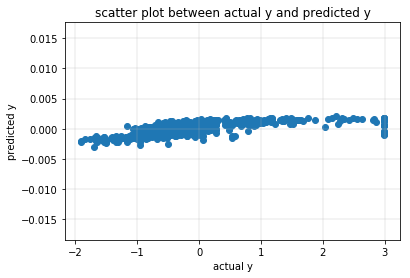

error= 0.9985375823741602
**************************************************************


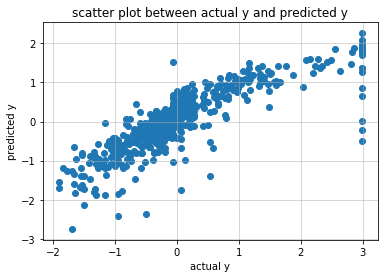

mean sq error= 0.29601678286263233
Maximum number of iteration= 1
***********************************************************


In [79]:
w,b,error=manual_sgd(alpha=0.0001,lr_rate=0.01,n_iter=1)
results.loc[0]=[0, 'Manual_SGD', 0.0001, 0.01, 1, w, b, error]

w,b,error=sklearn_sgd(alpha=0.0001,lr_rate=0.01,n_iter=1)
results.loc[1]=[1, 'SKlearn_SGD', 0.0001,0.01,1, w, b, error]

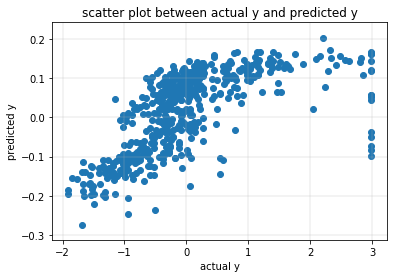

error= 0.8763587488454847
**************************************************************


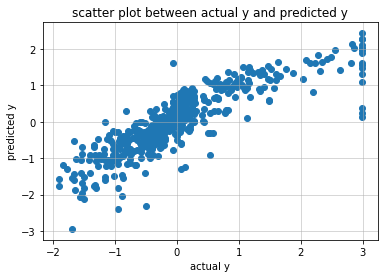

mean sq error= 0.25963379106823126
Maximum number of iteration= 100
***********************************************************


In [80]:
w,b,error=manual_sgd(alpha=0.0001,lr_rate=0.01,n_iter=100)
results.loc[4]=[4, 'Manual_SGD', 0.0001,0.01,100, w, b, error]

w,b,error=sklearn_sgd(alpha=0.0001,lr_rate=0.01,n_iter=100)
results.loc[5]=[5, 'SKlearn_SGD', 0.0001,0.01,100, w,b,error]

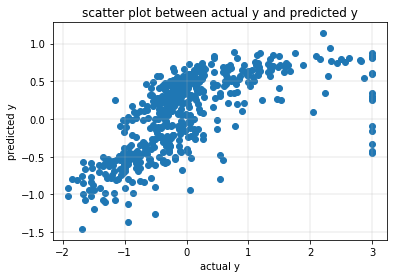

error= 0.5771405881414906
**************************************************************


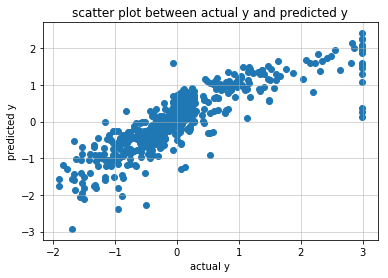

mean sq error= 0.2594973128390944
Maximum number of iteration= 1000
***********************************************************


In [81]:
w,b,error=manual_sgd(alpha=0.0001,lr_rate=0.01,n_iter=1000)
results.loc[6]=[6, 'Manual_SGD', 0.0001,0.01,1000, w,b,error]

w,b,error=sklearn_sgd(alpha=0.0001,lr_rate=0.01,n_iter=1000)
results.loc[7]=[7, 'SKlearn_SGD', 0.0001,0.01,1000, w,b,error]

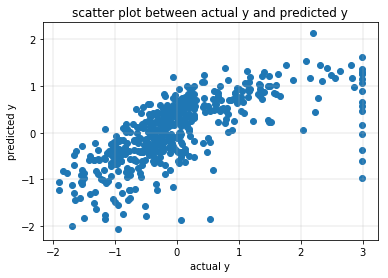

error= 0.5310184235628574
**************************************************************


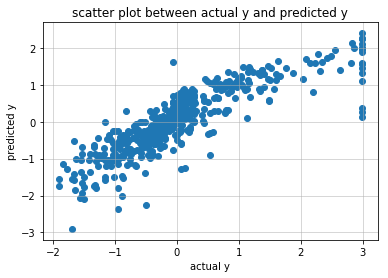

mean sq error= 0.25939250646535666
Maximum number of iteration= 10000
***********************************************************


In [82]:
w,b,error=manual_sgd(alpha=0.0001,lr_rate=0.01,n_iter=10000)
results.loc[8]=[8, 'Manual_SGD', 0.0001,0.01,10000, w,b,error]

w,b,error=sklearn_sgd(alpha=0.0001,lr_rate=0.01,n_iter=10000)
results.loc[9]=[9, 'SKlearn_SGD', 0.0001,0.01,10000, w,b,error]

In [83]:
results

,sno,algo,alpha,init_lr_rate,n_iter,weight,intercept,error
0,0,Manual_SGD,0.0001,0.01,1,"[[-6.931550483673108e-05, -8.718166531702745e-...",[0.00016636189911452092],0.998538
1,1,SKlearn_SGD,0.0001,0.01,1,"[-0.07742519338874486, 0.04804328807342034, -0...",[-0.0071628270255034345],0.296017
4,4,Manual_SGD,0.0001,0.01,100,"[[-0.006206576105210674, -0.008101354188986604...",[0.014884942620773662],0.876359
5,5,SKlearn_SGD,0.0001,0.01,100,"[-0.10124733895573249, 0.11798991868751621, 0....",[0.0010130812402604113],0.259634
6,6,Manual_SGD,0.0001,0.01,1000,"[[-0.026410201684800766, -0.04695743578312188,...",[0.06299262009901374],0.577141
7,7,SKlearn_SGD,0.0001,0.01,1000,"[-0.10089931800742427, 0.11879727518006586, 0....",[-0.00011031510396503836],0.259497
8,8,Manual_SGD,0.0001,0.01,10000,"[[-0.020752725600802945, -0.07813056780485883,...",[0.05289423077898489],0.531018
9,9,SKlearn_SGD,0.0001,0.01,10000,"[-0.10014995937820508, 0.11751493827689273, 0....",[0.00017026462178552554],0.259393


In [84]:
from prettytable import PrettyTable
    
x = PrettyTable()

x.field_names = ["sno", "Algo", "Alpha","Init+lr_rate", "n_iter", "weight", "intercept", "error"]

for i in range(len(results)):
    x.add_row(results.iloc[i])


print(x)


+-----+-------------+--------+--------------+--------+---------------------------------------------------------------------------+---------------+---------------------+
| sno |     Algo    | Alpha  | Init+lr_rate | n_iter |                                   weight                                  |   intercept   |        error        |
+-----+-------------+--------+--------------+--------+---------------------------------------------------------------------------+---------------+---------------------+
|  0  |  Manual_SGD | 0.0001 |     0.01     |   1    |     [[-6.93155048e-05 -8.71816653e-05 -1.99710067e-04 -4.53500153e-05     |  [0.00016636] |  0.9985375823741602 |
|     |             |        |              |        |       -1.41609251e-04  2.20859239e-04 -1.12886267e-04  1.42615907e-04     |               |                     |
|     |             |        |              |        |       -1.36944269e-04 -1.86259196e-04  2.17079767e-05  7.37121466e-05     |               |         

### From both above manual and sklearn SGD implementations, we can observe that as we increase the number of iterations upto 1000 the error value comes close to sklearn SGD error.But after 1000 iterations, the manual SGD error increases as the number of iterations increases.

In [ ]:
# code source:https://medium.com/@haydar_ai/learning-data-science-day-9-linear-regression-on-boston-housing-dataset-cd62a80775ef
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

lm = LinearRegression()
lm.fit(X_train, Y_train)

Y_pred = lm.predict(X_test)

plt.scatter(Y_test, Y_pred)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")
plt.show()

In [ ]:
delta_y = Y_test - Y_pred;

import seaborn as sns;
import numpy as np;
sns.set_style('whitegrid')
sns.kdeplot(np.array(delta_y), bw=0.5)
plt.show()


In [ ]:
sns.set_style('whitegrid')
sns.kdeplot(np.array(Y_pred), bw=0.5)
plt.show()

In [ ]:
# Make a prediction with coefficients
def predict(row, coefficients):
    yhat = coefficients[0]
    for i in range(len(row)-1):
        yhat += coefficients[i + 1] * row[i]
    return yhat

In [ ]:
# Estimate linear regression coefficients using stochastic gradient descent
def coefficients_sgd(train, l_rate, n_epoch):
    coef = [0.0 for i in range(len(train[0]))]
    for epoch in range(n_epoch):
        for row in train:
            yhat = predict(row, coef)
            error = yhat - row[-1]
            coef[0] = coef[0] - l_rate * error
            for i in range(len(row)-1):
                coef[i + 1] = coef[i + 1] - l_rate * error * row[i]
            # print(l_rate, n_epoch, error)
    return coef

In [ ]:
# Linear Regression Algorithm With Stochastic Gradient Descent
def linear_regression_sgd(train, test, l_rate, n_epoch):
    predictions = list()
    coef = coefficients_sgd(train, l_rate, n_epoch)
    for row in test:
        yhat = predict(row, coef)
        predictions.append(yhat)
    return(predictions)
 